<h1>Analyze the data for various variable characteristics such as:</h1>
<ol>
   <li>Missing Data</li>
   <li>Cardinality</li>
   <li>Category Frequency</li>
   <li>Distributions</li>
   <li>Outliers</li>
   <li>Magnitude.</li>
 </ol>

In [18]:
import pandas as pd
import numpy as np

In [19]:
# 1) Missingdata
m_d=pd.read_excel('coalpublic2013.xlsx')

In [20]:
m_d

,Year,MSHA ID,Mine_Name,Production,Labor_Hours,Month,Day,Year2
0,2013.0,103381.0,Tacoa Highwall Miner,56004.0,22392.0,1,1.0,2016.0
1,2013.0,103404.0,Reid School Mine,28807.0,28447.0,2,2.0,2017.0
2,NaN,100759.0,North River #1 Underground Min,1440115.0,474784.0,3,3.0,NaN
3,2013.0,103246.0,Bear Creek,NaN,29193.0,4,4.0,2019.0
4,2013.0,103451.0,Knight Mine,147499.0,46393.0,5,NaN,2020.0
5,2013.0,NaN,Crane Central Mine,69339.0,NaN,6,6.0,NaN
6,2013.0,100329.0,Concord Mine,0.0,144002.0,7,7.0,2022.0
7,2013.0,100851.0,NaN,2269014.0,1001809.0,8,8.0,2023.0
8,2013.0,102901.0,Shoal Creek Mine,0.0,12396.0,9,9.0,2024.0
9,2013.0,102901.0,NaN,1453024.0,NaN,10,10.0,NaN


In [50]:
''' In a 'Year2' column have null values,if you want to  change the 'Year2' column data type 
    that the column 'Year2' not changes data type because of there are have null values
'''
#m_d['Year2'].astype('int')

" In a 'Year2' column have null values,if you want to  change the 'Year2' column data type \n    that the column 'Year2' not changes data type because of there are have null values\n"

In [5]:
# the 'columns' function return the total columns in dataframe(excel file)
m_d.columns

Index(['Year', 'MSHA ID', 'Mine_Name', 'Production', 'Labor_Hours', 'Month',
       'Day ', 'Year2'],
      dtype='object')

In [25]:
#Replace all values in the DataFrame with True for NULL values, otherwise False:

# m_d.isnull() # null values return True
m_d.notnull() # null values return False

,Year,MSHA ID,Mine_Name,Production,Labor_Hours,Month,Day,Year2
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,False
3,True,True,True,False,True,True,True,True
4,True,True,True,True,True,True,False,True
5,True,False,True,True,False,True,True,False
6,True,True,True,True,True,True,True,True
7,True,True,False,True,True,True,True,True
8,True,True,True,True,True,True,True,True
9,True,True,False,True,False,True,True,False


In [9]:
# Using 'isnull().sum()' will be counted the total null value in which per columns
m_d.isnull().sum()

Year           1
MSHA ID        1
Mine_Name      2
Production     1
Labor_Hours    3
Month          0
Day            1
Year2          3
dtype: int64

In [12]:
#Using the for loop counts the missing value(Data)
for column in m_d.columns.values.tolist():
    print(column)
    print(m_d[column].value_counts())
    print("")

Year
2013.0    11
Name: Year, dtype: int64

MSHA ID
102901.0    2
103381.0    1
103404.0    1
100759.0    1
103246.0    1
103451.0    1
100329.0    1
100851.0    1
103180.0    1
103182.0    1
Name: MSHA ID, dtype: int64

Mine_Name
Tacoa Highwall Miner              1
Reid School Mine                  1
North River #1 Underground Min    1
Bear Creek                        1
Knight Mine                       1
Crane Central Mine                1
Concord Mine                      1
Shoal Creek Mine                  1
Sloan Mountain Mine               1
Fishtrap                          1
Name: Mine_Name, dtype: int64

Production
0.0          2
56004.0      1
28807.0      1
1440115.0    1
147499.0     1
69339.0      1
2269014.0    1
1453024.0    1
327780.0     1
175058.0     1
Name: Production, dtype: int64

Labor_Hours
22392.0      1
28447.0      1
474784.0     1
29193.0      1
46393.0      1
144002.0     1
1001809.0    1
12396.0      1
196963.0     1
Name: Labor_Hours, dtype: int64

Month

In [10]:
# Using the 'type(variale)' we will get which types of data structures contains in the pandas Frame 
type(m_d)

pandas.core.frame.DataFrame

In [30]:
m_d['MSHA ID'].value_counts()

102901.0    2
103381.0    1
103404.0    1
100759.0    1
103246.0    1
103451.0    1
100329.0    1
100851.0    1
103180.0    1
103182.0    1
Name: MSHA ID, dtype: int64

In [31]:
m_d['MSHA ID'].value_counts().idxmax()

102901.0

In [ ]:
#b)Cardinality

'''
    --Determining cardinality in categorical variables
    --The number of unique categories in a variable is called cardinality
'''


In [55]:
#In this example, unique() method is used to know all type of unique values in Team column.
m_d['Production'].unique()

array([  56004.,   28807., 1440115.,      nan,  147499.,   69339.,
             0., 2269014., 1453024.,  327780.,  175058.])

In [56]:
#The nunique() method returns the number of unique values for each column.
#The nunique() method ignores missing values by default.
m_d['Production'].nunique()

10

In [57]:
'''
-The dropna() method removes the rows that contains NULL values.
-The dropna() method returns a new DataFrame object unless the inplace parameter is set to True, in that case 
-the dropna() method does the removing in the original DataFrame instead.
-You can use the dropna() function to drops rows from a pandas DataFrame that contain missing values.
'''
m_d.dropna()

,Year,MSHA ID,Mine_Name,Production,Labor_Hours,Month,Day,Year2
0,2013.0,103381.0,Tacoa Highwall Miner,56004.0,22392.0,1,1.0,2016.0
1,2013.0,103404.0,Reid School Mine,28807.0,28447.0,2,2.0,2017.0
6,2013.0,100329.0,Concord Mine,0.0,144002.0,7,7.0,2022.0
8,2013.0,102901.0,Shoal Creek Mine,0.0,12396.0,9,9.0,2024.0
10,2013.0,103180.0,Sloan Mountain Mine,327780.0,196963.0,11,11.0,2026.0


In [11]:
m_d.dropna(thresh=2)

,Year,MSHA ID,Mine_Name,Production,Labor_Hours,Month,Day,Year2
0,2013.0,103381.0,Tacoa Highwall Miner,56004.0,22392.0,1,1.0,2016.0
1,2013.0,103404.0,Reid School Mine,28807.0,28447.0,2,2.0,2017.0
2,NaN,100759.0,North River #1 Underground Min,1440115.0,474784.0,3,3.0,NaN
3,2013.0,103246.0,Bear Creek,NaN,29193.0,4,4.0,2019.0
4,2013.0,103451.0,Knight Mine,147499.0,46393.0,5,NaN,2020.0
5,2013.0,NaN,Crane Central Mine,69339.0,NaN,6,6.0,NaN
6,2013.0,100329.0,Concord Mine,0.0,144002.0,7,7.0,2022.0
7,2013.0,100851.0,NaN,2269014.0,1001809.0,8,8.0,2023.0
8,2013.0,102901.0,Shoal Creek Mine,0.0,12396.0,9,9.0,2024.0
9,2013.0,102901.0,NaN,1453024.0,NaN,10,10.0,NaN


In [12]:
'''
You can also use the thresh argument to specify the minimum number of non-NaN values that a row 
or column must have in order to be kept in the DataFrame.
'''
#only keep rows with at least 2 non-NaN values
m_d.dropna(thresh = 2)

,Year,MSHA ID,Mine_Name,Production,Labor_Hours,Month,Day,Year2
0,2013.0,103381.0,Tacoa Highwall Miner,56004.0,22392.0,1,1.0,2016.0
1,2013.0,103404.0,Reid School Mine,28807.0,28447.0,2,2.0,2017.0
2,NaN,100759.0,North River #1 Underground Min,1440115.0,474784.0,3,3.0,NaN
3,2013.0,103246.0,Bear Creek,NaN,29193.0,4,4.0,2019.0
4,2013.0,103451.0,Knight Mine,147499.0,46393.0,5,NaN,2020.0
5,2013.0,NaN,Crane Central Mine,69339.0,NaN,6,6.0,NaN
6,2013.0,100329.0,Concord Mine,0.0,144002.0,7,7.0,2022.0
7,2013.0,100851.0,NaN,2269014.0,1001809.0,8,8.0,2023.0
8,2013.0,102901.0,Shoal Creek Mine,0.0,12396.0,9,9.0,2024.0
9,2013.0,102901.0,NaN,1453024.0,NaN,10,10.0,NaN


In [13]:
#'dropna(axis=1)' the 'axis = 1' method returns which columns are not null values 
m_d.dropna(axis=1)

,Month
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [15]:
#Category Frequency
'''
Method #1: Using Series.value_counts()

This method is applicable to pandas.Series object.
Since each DataFrame object is a collection of Series object,
we can apply this method to get the frequency counts of values in one column.
'''

m_d['Production'].value_counts()

0.0          2
56004.0      1
28807.0      1
1440115.0    1
147499.0     1
69339.0      1
2269014.0    1
1453024.0    1
327780.0     1
175058.0     1
Name: Production, dtype: int64

In [19]:
'''
Method #2: Using GroupBy.count()

This method can be used to count frequencies of objects over single columns.
After grouping a DataFrame object on one column, 
we can apply count() method on the resulting groupby object to get a DataFrame object 
containing frequency count
'''
m_d.groupby(['Production']).count()

,Year,MSHA ID,Mine_Name,Labor_Hours,Month,Day,Year2
Production,,,,,,,
0.0,2,2,2,2,2,2,2
28807.0,1,1,1,1,1,1,1
56004.0,1,1,1,1,1,1,1
69339.0,1,0,1,0,1,1,0
147499.0,1,1,1,1,1,0,1
175058.0,1,1,1,0,1,1,1
327780.0,1,1,1,1,1,1,1
1440115.0,0,1,1,1,1,1,0
1453024.0,1,1,0,0,1,1,0


In [20]:
'''
Method #3: Using GroupBy.size()

This method can be used to count frequencies of objects over single or multiple columns.
After grouping a DataFrame object on one or more columns, 
we can apply size() method on the resulting groupby object to get a Series object containing frequency count.
'''
m_d.groupby(['Production']).size()

Production
0.0          2
28807.0      1
56004.0      1
69339.0      1
147499.0     1
175058.0     1
327780.0     1
1440115.0    1
1453024.0    1
2269014.0    1
dtype: int64

      Year   MSHA ID                       Mine_Name  Production  Labor_Hours  \
0   2013.0  103381.0            Tacoa Highwall Miner     56004.0      22392.0   
1   2013.0  103404.0                Reid School Mine     28807.0      28447.0   
2      NaN  100759.0  North River #1 Underground Min   1440115.0     474784.0   
3   2013.0  103246.0                      Bear Creek         NaN      29193.0   
4   2013.0  103451.0                     Knight Mine    147499.0      46393.0   
5   2013.0       NaN              Crane Central Mine     69339.0          NaN   
6   2013.0  100329.0                    Concord Mine         0.0     144002.0   
7   2013.0  100851.0                             NaN   2269014.0    1001809.0   
8   2013.0  102901.0                Shoal Creek Mine         0.0      12396.0   
9   2013.0  102901.0                             NaN   1453024.0          NaN   
10  2013.0  103180.0             Sloan Mountain Mine    327780.0     196963.0   
11  2013.0  103182.0        

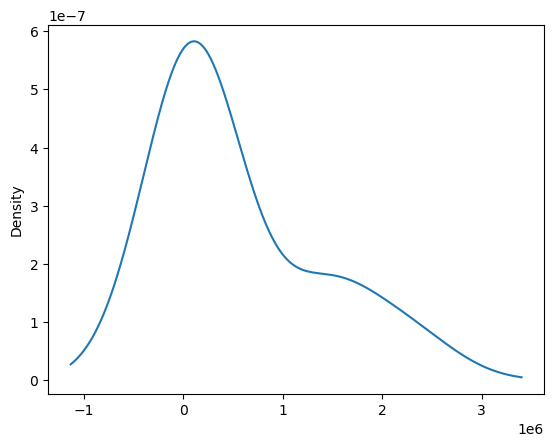

In [24]:
# Distributions:
''' /-Plot Distribution of Column Values in Pandas
    We can use the DataFrame.plot() function to distribute column values in a pandas DataFrame plot.
    It is an in-built function for data visualization.
    Using this function we can plot the given DataFrame in different ways. In this article,
    I will explain the plot() and using this function how to distribute the column values of a given DataFrame in different plots
    Reference:https://sparkbyexamples.com/pandas/plot-distribution-of-column-values-in-pandas/#:~:text=Plot%20Distribution%20of%20Column%20in%20Pandas%20using%20Histogram&text=It%20divides%20the%20values%20within,is%20on%20a%20similar%20scale.
'''

# plot distribution of values in Marks column
m_d['Production'].plot(kind='kde')
print(m_d)



In [ ]:
# e) Outliers
'''
From the above figure, we have:

The average weight of the first 4 kids were only 38.75 kg
The average weight of all kids are 91 kg
Adding the weight of 300 kg shoots the average weight from 38.75 kg to 91 kg.

In statistics, this is called an Outlier.
'''
# reference:https://www.shiksha.com/online-courses/articles/outliers-definition-and-examples-in-python/

In [ ]:
# f) Magnitude:
'''
    Using Numpy functions, it is easy to calculate the magnitude in Python. 
    To find the magnitude of the vector, we need to calculate the length of the vector.
    So we can say that here we are going to calculate the length of the given vector.
    To find the magnitude of the complex number, we are using the “abs” method.
'''